In [9]:
import pandas as pd

# Assuming your dataset is in CSV format, replace 'your_dataset.csv' with the actual path to your dataset
file_path = 'healthcare.csv'

# Assuming your dataset has a header, if not, set header=None
# Replace column names with actual column names from your dataset
# Replace delimiter with the appropriate delimiter used in your dataset, default is ',' for CSV
df = pd.read_csv(file_path, header=0, delimiter=',')

# Display the first few rows of the DataFrame to understand its structure
print("First few rows of the dataset:")
print(df.head())

# Display information about the dataset, including the number of non-null values and data types of each column
print("\nInformation about the dataset:")
print(df.info())

# Display basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
print(df.describe())

# Check for any missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())
df.info()


First few rows of the dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Information about the da

In [10]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset
# Load your dataset into the DataFrame 'df' before executing this code

# Create target variable based on 'stroke' column
df['target'] = df['stroke']

# Display the modified DataFrame with the new target variable
print(df.head())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  target  
0       1       1  
1       1       1  
2       1       1  
3       1       1  
4       1       1  


In [11]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load dataset
dataset = pd.read_csv("healthcare.csv")

# Preprocessing
# Replace missing values in the 'bmi' column with mean
imputer = SimpleImputer(strategy='mean')
dataset['bmi'] = imputer.fit_transform(dataset[['bmi']])

# Handle categorical variables
dataset = pd.get_dummies(dataset)  # One-hot encoding

# Identify the correct column name for the target variable
target_column = 'stroke'  # Replace 'stroke' with the actual name of your target variable

# Assume 'stroke' is the target variable
X = dataset.drop(target_column, axis=1)
y = dataset[target_column]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_pred)
print("Random Forest Mean Squared Error:", rf_mse)

# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_mse = mean_squared_error(y_test, xgb_pred)
print("XGBoost Mean Squared Error:", xgb_mse)


Random Forest Mean Squared Error: 0.053546868884540105
XGBoost Mean Squared Error: 0.06378046704707052


In [13]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load dataset
dataset = pd.read_csv("healthcare.csv")

# Preprocessing
# Replace missing values in the 'bmi' column with mean
imputer = SimpleImputer(strategy='mean')
dataset['bmi'] = imputer.fit_transform(dataset[['bmi']])

# Handle categorical variables
dataset = pd.get_dummies(dataset)  # One-hot encoding

# Identify the correct column name for the target variable
target_column = 'stroke'  # Replace 'hospital_bed_count' with the actual name of your target variable

# Assume 'hospital_bed_count' is the target variable
X = dataset.drop(target_column, axis=1)
y = dataset[target_column]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating ensemble models
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model2 = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fitting the models on the training data
model1.fit(X_train_scaled, y_train)
model2.fit(X_train_scaled, y_train)

# Making predictions on the testing data
pred1 = model1.predict(X_test_scaled)
pred2 = model2.predict(X_test_scaled)

# Ensemble prediction (simple averaging)
ensemble_pred = (pred1 + pred2) / 2

# Evaluating ensemble model
mse = mean_squared_error(y_test, ensemble_pred)
print("Ensemble Mean Squared Error:", mse)


Ensemble Mean Squared Error: 0.052309470611435704


In [14]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Random Forest Confusion Matrix:
[[959   1]
 [ 61   1]]

Random Forest Accuracy: 0.9393346379647749

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.91      0.94      0.91      1022


Random Forest Cross-Validation Scores:
[-0.01346089 -0.03700206 -0.02302227  0.00714316  0.00510858]


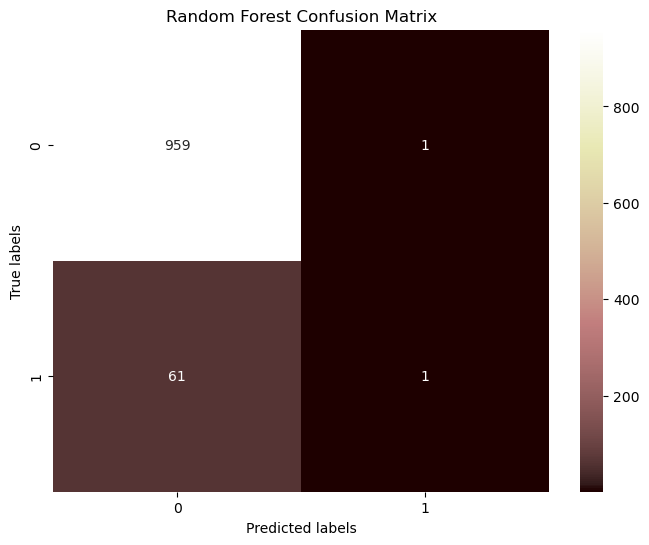

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Confusion Matrix, Accuracy, and Classification Report for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred.round())
rf_accuracy = accuracy_score(y_test, rf_pred.round())
rf_classification_report = classification_report(y_test, rf_pred.round())

print("Random Forest Confusion Matrix:")
print(rf_cm)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("\nRandom Forest Classification Report:")
print(rf_classification_report)

# Cross-validation score for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print("\nRandom Forest Cross-Validation Scores:")
print(rf_cv_scores)
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap for Random Forest Confusion Matrix with pink color
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="pink")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


XGBoost Confusion Matrix:
[[949  11]
 [ 55   7]]

XGBoost Accuracy: 0.9354207436399217

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       960
           1       0.39      0.11      0.18        62

    accuracy                           0.94      1022
   macro avg       0.67      0.55      0.57      1022
weighted avg       0.91      0.94      0.92      1022


XGBoost Cross-Validation Scores:
[-0.14279218 -0.25826555 -0.16415308 -0.15904332 -0.15597593]


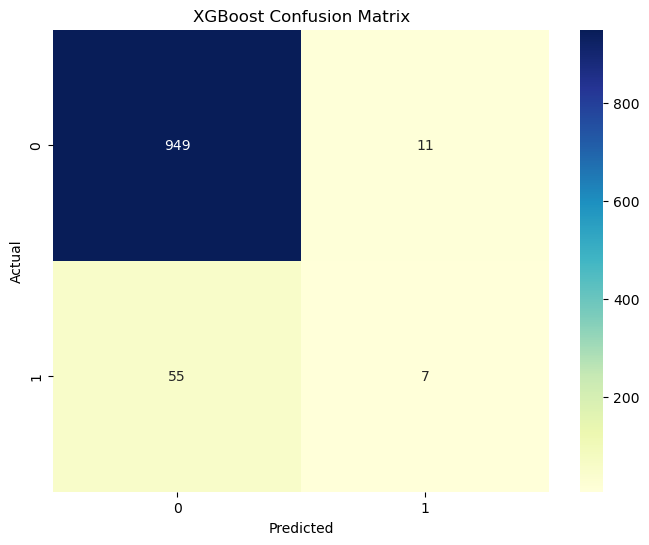

In [16]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Confusion Matrix for XGBoost
xgb_cm = confusion_matrix(y_test, xgb_pred.round())
print("XGBoost Confusion Matrix:")
print(xgb_cm)

# Accuracy for XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred.round())
print("\nXGBoost Accuracy:", xgb_accuracy)

# Classification Report for XGBoost
xgb_classification_report = classification_report(y_test, xgb_pred.round())
print("\nXGBoost Classification Report:")
print(xgb_classification_report)

# Cross-validation score for XGBoost
xgb_cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5)
print("\nXGBoost Cross-Validation Scores:")
print(xgb_cv_scores)
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Confusion Matrix Heatmap for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, cmap='YlGnBu', fmt='g')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


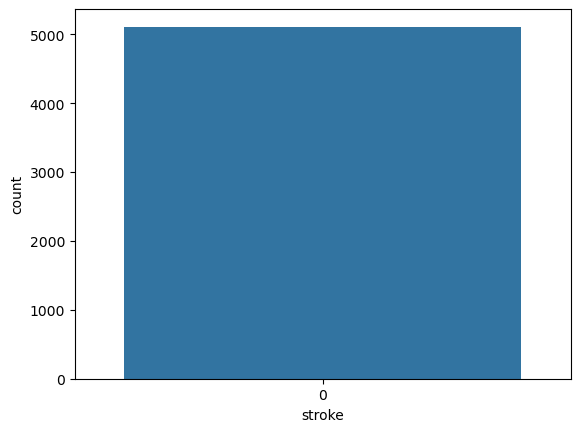

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['target'])
plt.xlabel("stroke")
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Assuming you have loaded your dataset into a DataFrame called df
# Assuming 'target' is your target variable, replace it with the actual name of your target variable
X = dataset.drop('stroke', axis=1)
y = dataset['stroke']

# Impute missing values in the feature matrix X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Creating and training the random forest classifier
rf_classifier = RandomForestClassifier(criterion='entropy',max_depth=6,n_estimators=80, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)
print(y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Cross-validation score
cross_val_scores = cross_val_score(rf_classifier, X_imputed, y, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())


[0 0 0 ... 0 0 0]
Confusion Matrix:
[[1444    0]
 [  89    0]]
Accuracy Score: 0.9419439008480104
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Scores: [0.95107632 0.95107632 0.95107632 0.95107632 0.95205479]
Mean Cross-Validation Score: 0.9512720156555773


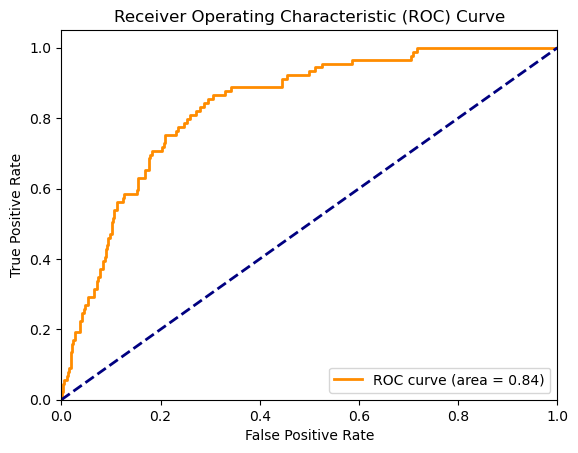

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Predict probabilities for the positive class
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

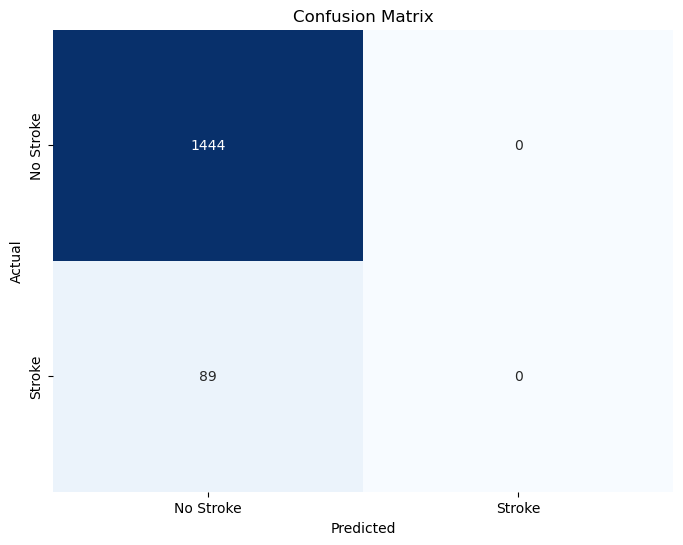

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, rf_classifier.predict(X_test))

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
